# Import relevant libraries

In [173]:
import os
import json
import matplotlib.pyplot as plt 
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import Polygon
from pyproj import CRS
from shapely.geometry import Point
import contextily as ctx
import numpy as np

# Load UK shape file

In [250]:
# load geodata
uk = gpd.read_file("London_Borough_Excluding_MHW.json")

# set Coordinate Reference Systems
crs_27700 = CRS("EPSG:27700") #"EPSG:32633")
#4326
crs_27700
uk.crs = crs_27700

In [251]:
os.getcwd()

'/Users/anushagooda/Documents/GitHub/intro-to-Python-SMM692/data-viz-ftp/scripts/visualization'

In [252]:
uk.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [253]:
uk = uk.to_crs("EPSG:4326")

In [254]:
uk

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,,,"POLYGON ((-0.31772 51.39367, -0.31729 51.39336..."
1,Croydon,E09000008,8649.441,0.000,F,,,"POLYGON ((-0.15657 51.32151, -0.15651 51.32144..."
2,Bromley,E09000006,15013.487,0.000,F,,,"POLYGON ((0.00227 51.32914, 0.00234 51.32890, ..."
3,Hounslow,E09000018,5658.541,60.755,F,,,"POLYGON ((-0.24456 51.48870, -0.24460 51.48879..."
4,Ealing,E09000009,5554.428,0.000,F,,,"POLYGON ((-0.37781 51.55499, -0.37780 51.55496..."
5,Havering,E09000016,11445.735,210.763,F,,,"POLYGON ((0.15869 51.51219, 0.15871 51.51219, ..."
6,Hillingdon,E09000017,11570.063,0.000,F,,,"POLYGON ((-0.40407 51.61318, -0.40505 51.61335..."
7,Harrow,E09000015,5046.330,0.000,F,,,"POLYGON ((-0.40407 51.61318, -0.40388 51.61229..."
8,Brent,E09000005,4323.270,0.000,F,,,"POLYGON ((-0.21603 51.52793, -0.21609 51.52887..."
9,Barnet,E09000003,8674.837,0.000,F,,,"POLYGON ((-0.18211 51.66860, -0.18497 51.66849..."


In [255]:
# select only relevant columns
uk = uk[['NAME', 'geometry']]
# rename column
uk.rename(columns = {'NAME': 'district'}, inplace = True)

/Users/anushagooda/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


uk.head()

In [160]:
#uk.set_crs(epsg=4326, inplace=True, allow_override=True)

(-0.5525946006679409,
 0.37623509586799603,
 51.26650445883892,
 51.71212980800797)

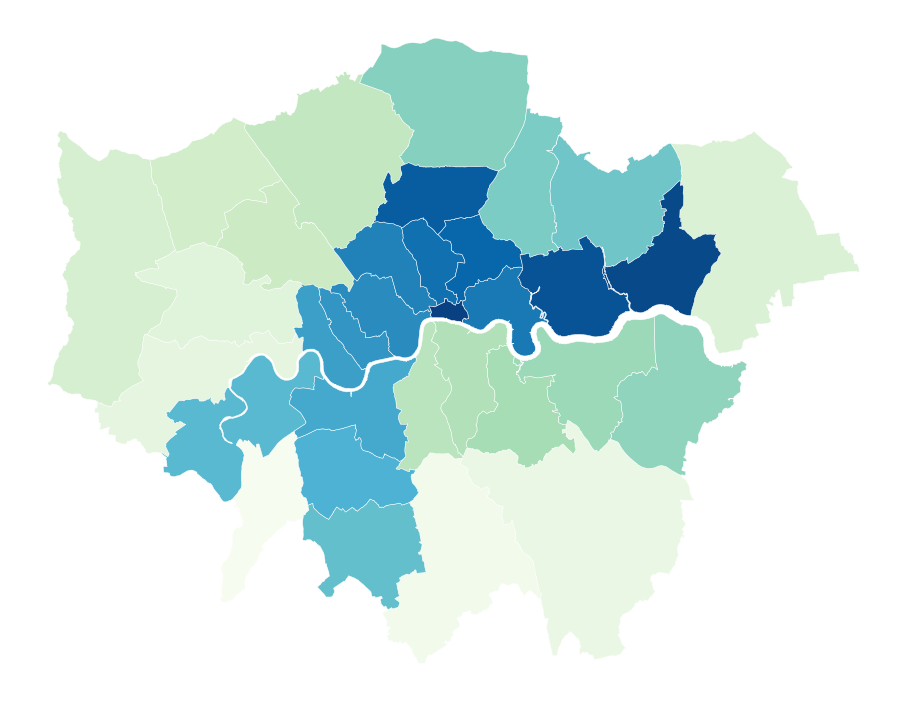

In [305]:
ax = uk.plot (figsize = (16, 16), cmap='GnBu', linewidths = 0.5, edgecolors = 'white')
ax.axis('off')

In [209]:
print(uk.crs)
print(tech_roundabout_coordinates.crs)

EPSG:4326
None


In [210]:
print(uk.total_bounds)
print(tech_roundabout_coordinates.total_bounds)

[-0.51037507 51.28676016  0.33401556 51.69187411]
[-109.223569     -4.9301288   113.00018815   53.33665955]


# Load tech roundabout data

In [211]:
# set file path
base_path = '../..'
file_path = os.path.join(base_path, 'datasets', 'tech_roundabout_coordinates.csv')

# load data
tech_roundabout = pd.read_csv(file_path)

In [212]:
sum(tech_roundabout['RegAddress.PostCode'] == 'EC2N 1HQ')

251

In [213]:
# set-up coordinates
tech_roundabout_coordinates = tech_roundabout[['CompanyName', 'latitude', 'longitude']]

tech_roundabout_coordinates = gpd.GeoDataFrame(
    tech_roundabout_coordinates.drop(['latitude','longitude'], axis = 1),
    geometry=[Point(xy) for xy in zip(tech_roundabout_coordinates.longitude,
                                      tech_roundabout_coordinates.latitude)])

In [214]:
# project to epsg:4326 --  = crs_27700
tech_roundabout_coordinates.set_crs(crs = 'EPSG:4326',epsg=27700, inplace=True, allow_override=True)

,CompanyName,geometry
0,!BIG IMPACT GRAPHICS LIMITED,POINT (-0.07869 51.52702)
1,"""K"" LINE (EUROPE) LIMITED",POINT (-0.09736 51.51757)
2,"""K"" LINE BULK SHIPPING (UK) LIMITED",POINT (-0.09736 51.51757)
3,"""K"" LINE HOLDING (EUROPE) LIMITED",POINT (-0.09736 51.51757)
4,"""K"" LINE LNG SHIPPING (UK) LIMITED",POINT (-0.09736 51.51757)
...,...,...
97964,ÉCLAT CENTURY SERVICES LIMITED,POINT (-0.08881 51.52725)
97965,ÉLEVAGE JOLIVET LTD,POINT (-0.08881 51.52725)
97966,ÜVIEW LIMITED,POINT (-0.08371 51.52559)
97967,‘ADORE BOURNEMOUTH LTD,POINT (-0.08013 51.52639)


# Spatial join

In [216]:
#tech_roundabout_coordinates_crs = tech_roundabout_coordinates.set_crs("EPSG:27700")

In [217]:
# get district
tech_roundabout_full = gpd.sjoin(tech_roundabout_coordinates_crs, uk, 
                                 how = 'left', op = 'within').drop(columns = 'index_right')

<ipython-input-217-9cb90ab2418c>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: EPSG:4326

  tech_roundabout_full = gpd.sjoin(tech_roundabout_coordinates_crs, uk,


In [218]:
tech_roundabout_full

,CompanyName,geometry,district
0,!BIG IMPACT GRAPHICS LIMITED,POINT (-0.07869 51.52702),Hackney
1,"""K"" LINE (EUROPE) LIMITED",POINT (-0.09736 51.51757),City of London
2,"""K"" LINE BULK SHIPPING (UK) LIMITED",POINT (-0.09736 51.51757),City of London
3,"""K"" LINE HOLDING (EUROPE) LIMITED",POINT (-0.09736 51.51757),City of London
4,"""K"" LINE LNG SHIPPING (UK) LIMITED",POINT (-0.09736 51.51757),City of London
...,...,...,...
97964,ÉCLAT CENTURY SERVICES LIMITED,POINT (-0.08881 51.52725),Islington
97965,ÉLEVAGE JOLIVET LTD,POINT (-0.08881 51.52725),Islington
97966,ÜVIEW LIMITED,POINT (-0.08371 51.52559),Hackney
97967,‘ADORE BOURNEMOUTH LTD,POINT (-0.08013 51.52639),Hackney


In [219]:
# remove data points that are not in the uk --- bug when request for coordinate
tech_roundabout_full = tech_roundabout_full[~tech_roundabout_full.district.isna()]

In [220]:
# remove irrelevant data point --- postcode provided cannot be found on Google Map
tech_roundabout_full = tech_roundabout_full[~tech_roundabout_full['district'].isin(['Brentwood', 'Sheffield'])]

In [221]:
tech_roundabout_full

,CompanyName,geometry,district
0,!BIG IMPACT GRAPHICS LIMITED,POINT (-0.07869 51.52702),Hackney
1,"""K"" LINE (EUROPE) LIMITED",POINT (-0.09736 51.51757),City of London
2,"""K"" LINE BULK SHIPPING (UK) LIMITED",POINT (-0.09736 51.51757),City of London
3,"""K"" LINE HOLDING (EUROPE) LIMITED",POINT (-0.09736 51.51757),City of London
4,"""K"" LINE LNG SHIPPING (UK) LIMITED",POINT (-0.09736 51.51757),City of London
...,...,...,...
97964,ÉCLAT CENTURY SERVICES LIMITED,POINT (-0.08881 51.52725),Islington
97965,ÉLEVAGE JOLIVET LTD,POINT (-0.08881 51.52725),Islington
97966,ÜVIEW LIMITED,POINT (-0.08371 51.52559),Hackney
97967,‘ADORE BOURNEMOUTH LTD,POINT (-0.08013 51.52639),Hackney


# Visualize data

In [222]:
tech_roundabout_district = uk[uk['district'].isin(tech_roundabout_full['district'].unique())]

In [223]:
tech_roundabout_district

,district,geometry
25,Camden,"POLYGON ((-0.14242 51.56912, -0.14241 51.56928..."
26,Tower Hamlets,"POLYGON ((-0.07938 51.50784, -0.07931 51.50784..."
27,Islington,"POLYGON ((-0.14242 51.56912, -0.14250 51.56901..."
28,Hackney,"POLYGON ((-0.06118 51.57778, -0.06272 51.57747..."
32,City of London,"POLYGON ((-0.11157 51.51075, -0.11127 51.51076..."


/Users/anushagooda/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


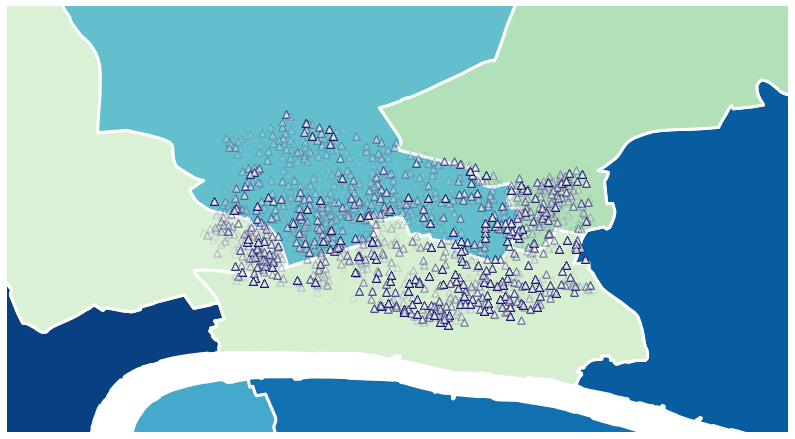

In [313]:
fig, ax = plt.subplots(figsize = (14,14))

ax.set_aspect('equal')
ax.axis('off')
uk.plot(column = 'district', ax=ax, edgecolor='white', cmap='GnBu', linewidth = 3)
tech_roundabout_full.plot(ax=ax, marker='^', markersize=50, alpha = 0.05, column='district', color = 'white', edgecolor = 'midnightblue')
# set boundary
xmin, ymin, xmax, ymax = tech_roundabout_full.total_bounds
x_adj = abs((xmax - xmin)/2)
y_adj = abs((ymax - ymin)/2)
xlim = (xmin - x_adj, xmax + x_adj)
ylim = (ymin - y_adj, ymax + y_adj)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.show()

In [ ]:

# set boundary
xmin, ymin, xmax, ymax = tech_roundabout_full.total_bounds
x_adj = abs((xmax - xmin) / 14)
y_adj = abs((ymax - ymin) / 14)
xlim = (xmin - x_adj, xmax + x_adj)
ylim = (ymin - y_adj, ymax + y_adj)

ax.set_xlim(xlim)
ax.set_ylim(ylim)


In [232]:
tech_roundabout

,CompanyName,RegAddress.PostCode,RegAddress.PostTown,latitude,longitude
0,!BIG IMPACT GRAPHICS LIMITED,EC1V 9LT,LONDON,51.527024,-0.078695
1,"""K"" LINE (EUROPE) LIMITED",EC1A 4HD,LONDON,51.517573,-0.097357
2,"""K"" LINE BULK SHIPPING (UK) LIMITED",EC1A 4HD,LONDON,51.517573,-0.097357
3,"""K"" LINE HOLDING (EUROPE) LIMITED",EC1A 4HD,LONDON,51.517573,-0.097357
4,"""K"" LINE LNG SHIPPING (UK) LIMITED",EC1A 4HD,LONDON,51.517573,-0.097357
...,...,...,...,...,...
97964,ÉCLAT CENTURY SERVICES LIMITED,EC1V 2NX,LONDON,51.527246,-0.088808
97965,ÉLEVAGE JOLIVET LTD,EC1V 2NX,LONDON,51.527246,-0.088808
97966,ÜVIEW LIMITED,EC2A 4NE,LONDON,51.525590,-0.083715
97967,‘ADORE BOURNEMOUTH LTD,EC2A 3AR,LONDON,51.526394,-0.080132
